## 분산분석(ANalysis Of VAriance;ANOVA)

### 분산분석


- 평균값의 차이를 검정하는 방법
  - t-검정: **두개**의 데이터 비교
      **예)** 약을 먹었을 때와 아닐때 치료 효과, 비가 올때와 오지않을 때의 매상
  - 분산분석: **n개**의 데이터 비교
      **예)** 봄,여름,가을, 겨울에 따른 매상, 
  - 범주형 데이터에 적용가능     
  - 모집단이 **정규분포**를 따르는 데이터에 대해서만 적용할 수 있음, 수준 사이의 **분산값이 다르지 않음**
  
- 검정의 다중성 (?)
  - 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제 (t-검정)
  - 분산분석에는 이런 문제가 없음 
  
### 분산분석의 직감적 사고방식: F-비

- 귀무가설, 대립가설
  - 귀무가설: 수준 간의 평균값에 차이가 없다.
  - 대립가설: 수준 간의 평균값에 차이가 있다.
  
- 분산분석에서는 데이터의 변동을 **오차**와 **효과**로 분리

- F-비
    $$ F-비 = \frac{효과의 분산크기}{오차의 분산크기}$$
  - 두 분산값의 비를 추정하는 값 
  - 효과: 날씨에 따른 매상의 변동 
  - 오차: 날씨라는 변수를 이용해서 설명할 수 없는 매상의 변동 
  - 이 값이 크면 효과의 크기가 오차의 크기보다 큼 
  - 효과, 오차의 각 자유도에 의해 결정되는 F-분포($F(n_1 , n_2 )$)를 이용하며, p-값이 0.05보다 큰 지 작은지에 따라 오차에 비하여 무시할 만한지 그렇지 않은지를 구분함
  
  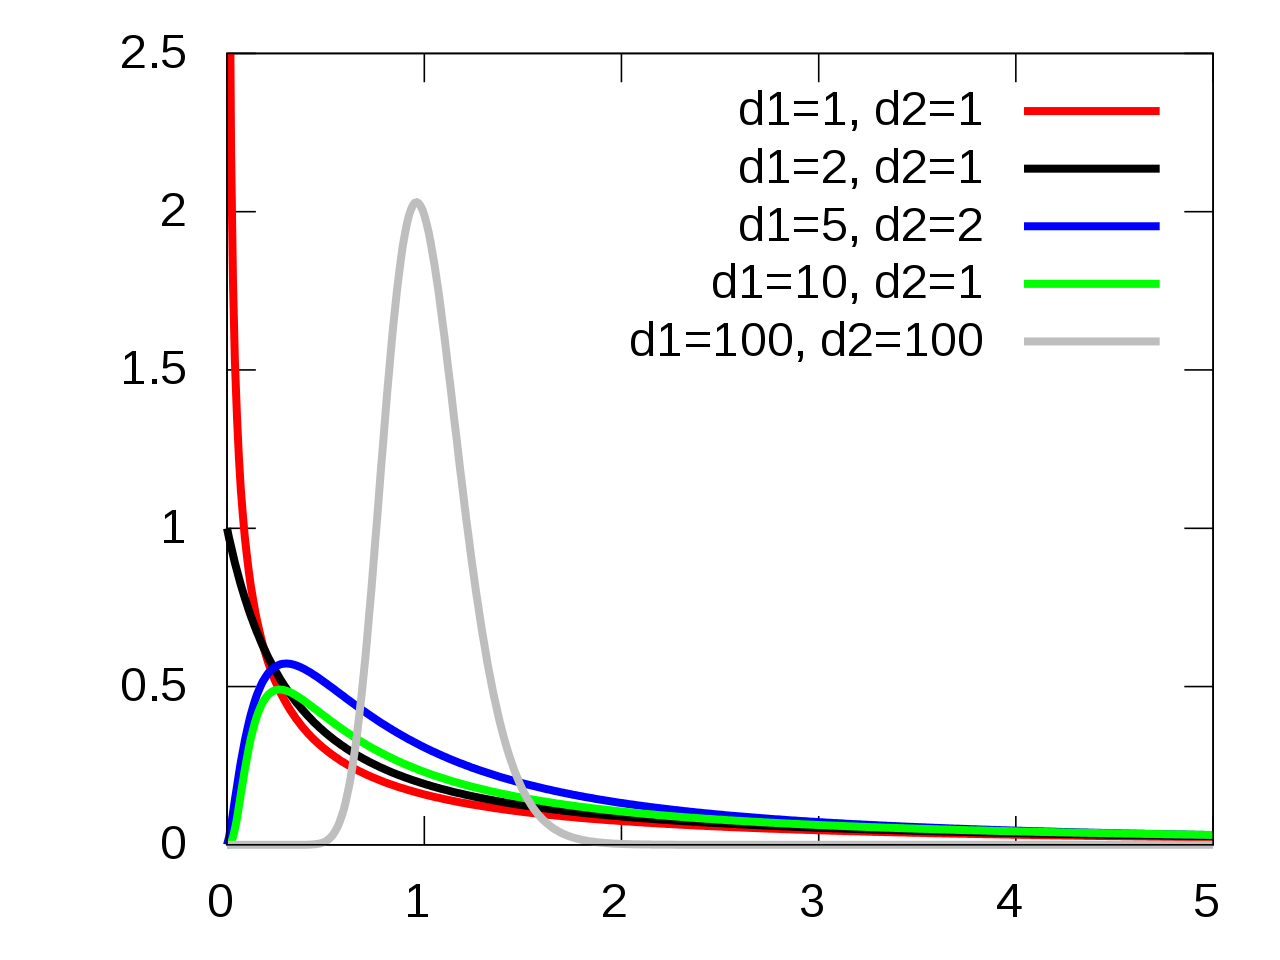

### 군간변동과 군내변동

- 군간변동: 효과의 크기
- 군내변동: 한 범주 내에서의 오차의 크기 
- 분산분석 ~ 군간변동/군내변동

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd
sns.set()

%precision 3
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

### 데이터 준비 

In [ ]:
weather= ["cloudy","cloudy","rainy","rainy","sunny","sunny"]
sales = [6,8,2,4,10,12]

weather_sales = pd.DataFrame({
    "sales": sales,
    "weather": weather
})

weather_sales

In [ ]:
sns.boxplot(x="weather",y="sales",data=weather_sales)

In [ ]:
weather_sales.groupby("weather").mean()

In [ ]:
weather_sales.groupby("weather").var()

### 군간제곱, 군내제곱


In [ ]:
# 날씨에 의한 영향을 모델로 예측한 결과

effect=[7,7,3,3,11,11]
effect

In [ ]:
# 날씨 효과로 설명할 수 있는 변동
mu_effect=sp.mean(effect)
squares_model=np.sum((effect-mu_effect)**2)
squares_model

In [ ]:
(effect-mu_effect)**2

In [ ]:
weather_sales["sales"]

In [ ]:
### 잔차의 제곱합

squares_resid=np.sum((weather_sales["sales"]-effect)**2)
squares_resid

### 군간분산과 군내분산 계산 

- **불편분산**을 계산하기 위하여 **각각의 자유도**로 나누어 주어야 함
- 군간변동의 자유도 = 수준수 - 1
  - 여기서는 수준수: 3
  - 군간변동 = 군간제곱합/군간변동의 자유도
- 군내변동의 자유도 = 샘플사이즈 - 수준수 
  - 여기서는 수준수: 3
  - 샘플사이즈: 6
  - 군내변동 = 군내제곱합/군내변동의 자유도 
- 이들의 비가 F-분포를 나타냄
  - P-값을 기준으로 군간변동이 군내변동에 비하여 의미가 있게 다른지를 확인함 


In [ ]:
df_model=3-1
df_resid=6-3

variance_model=squares_model/df_model
variance_resid=squares_resid/df_resid

F_ratio = variance_model/variance_resid

F_ratio

In [ ]:
sp.stats.f.cdf(16,df_model,df_resid)

In [ ]:
x=np.arange(1e-6,20,0.1)

plt.plot(x,sp.stats.f.pdf(x,df_model,df_resid))
print("P-value: ",1-sp.stats.f.cdf(16,df_model,df_resid))

### 독립변수가 카테고리형인 일반선형모델
- 모델

$$ 맥주 매상 \sim \mathcal{N} \left ( \beta_0 + \beta_1 \times 비 + \beta_2 \times 맑음, \sigma^2  \right ) $$

- 더미변수
  - 범주형 독립변수의 주어진 수준이 맞으면 1이되고 그렇지 않으면 0이되는 변수
  
### statsmodels를 이용한 분산분석
- 모델: $sales \sim weather$


In [ ]:
anova_model=smf.ols("sales~weather",data=weather_sales).fit()

In [ ]:
sm.stats.anova_lm(anova_model)

In [ ]:
anova_model.predict(pd.DataFrame({"weather": ["rainy"]}))

In [ ]:
anova_model.summary()

$ sales= \beta_0 + \beta_1 \times rainy + \beta_2 \times sunny $

### 회귀모델의 분산분석



In [ ]:
beer = pd.read_csv("5-1-1-beer.csv")

lm_model = smf.ols(formula="beer ~ temperature",data=beer).fit()
lm_model.summary()

In [ ]:
sm.stats.anova_lm(lm_model)

In [ ]:
test=pd.read_csv("age_gender.csv")
test

In [ ]:
sns.lmplot(x="age",y="income",hue="gender",data=test)

In [ ]:
lm_test = smf.ols(formula="income ~ age + gender",data=test).fit()

In [ ]:
lm_test.summary()

In [ ]:
sm.stats.anova_lm(lm_test,typ=2)

### 다중회귀

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd
sns.set()

%precision 3
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm


In [2]:

sales=pd.read_csv("5-3-1-lm-model.csv")
sales


,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy
...,...,...,...,...,...
95,24.2,315,208.4,11.9,sunny
96,33.1,315,215.4,23.0,sunny
97,33.6,315,220.2,22.1,sunny
98,29.6,315,212.6,24.1,sunny


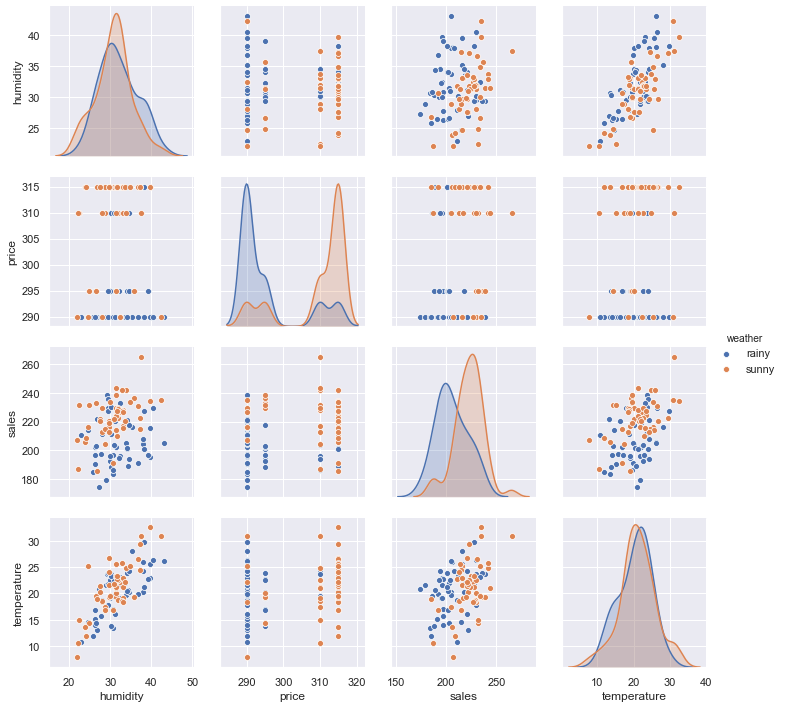

In [3]:

sns.pairplot(data=sales,hue="weather")


In [4]:

lm_no_good = smf.ols("sales~price",sales).fit()
lm_no_good.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.971
Date:                Sun, 03 May 2020   Prob (F-statistic):             0.0281
Time:                        18:30:43   Log-Likelihood:                -422.86
No. Observations:                 100   AIC:                             849.7
Df Residuals:                      98   BIC:                             854.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.6454     45.187      2.515      0.014      23.973     203.318
price          0.3328      0.149      2.230      0.028       0.037       0.629
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.651
Skew:                          -0.024   Prob(JB):                        0.722
Kurtosis:                       2.608   Cond. No.                     8.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

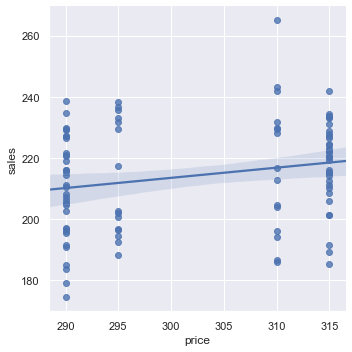

In [5]:
sns.lmplot("price","sales",sales)

In [6]:

lm_sales = smf.ols("sales~weather+price+humidity+temperature",sales).fit()

lm_sales.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     16.15
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.01e-10
Time:                        18:32:21   Log-Likelihood:                -399.39
No. Observations:                 100   AIC:                             808.8
Df Residuals:                      95   BIC:                             821.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          278.6277     46.335      6.013      0.000     186.641     370.615
weather[T.sunny]    19.9891      3.522      5.675      0.000      12.997      26.982
price               -0.3292      0.155     -2.123      0.036      -0.637      -0.021
humidity            -0.2541      0.456     -0.558      0.578      -1.159       0.651
temperature          1.6031      0.443      3.620      0.000       0.724       2.482
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.016
Skew:                          -0.028   Prob(JB):                        0.992
Kurtosis:                       3.027   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:

lm_str=list(["1"])
vars=["temperature","price","humidity","weather"]

for i in range(len(vars)):
    lm_str.append(vars[i])

for i in range(len(vars)):
    for j in range(i+1,len(vars)):
        lm_str.append(vars[i]+"+"+vars[j])

for i in range(len(vars)):
    for j in range(i+1,len(vars)):
        for k in range(j+1,len(vars)):
            lm_str.append(vars[i]+"+"+vars[j]+"+"+vars[k])

lm_str.append(vars[0]+"+"+vars[1]+"+"+vars[2]+"+"+vars[3])

for i in range(len(lm_str)):
    lm_str[i]="sales~"+lm_str[i]

lm_str

['sales~1',
 'sales~temperature',
 'sales~price',
 'sales~humidity',
 'sales~weather',
 'sales~temperature+price',
 'sales~temperature+humidity',
 'sales~temperature+weather',
 'sales~price+humidity',
 'sales~price+weather',
 'sales~humidity+weather',
 'sales~temperature+price+humidity',
 'sales~temperature+price+weather',
 'sales~temperature+humidity+weather',
 'sales~price+humidity+weather',
 'sales~temperature+price+humidity+weather']

In [8]:

lm_sales=list()
lm_aic=pd.DataFrame({
    "formula": lm_str,
    "aic": np.zeros(len(lm_str))
})

for i in range(len(lm_str)):
    lm_sales.append(smf.ols(lm_str[i],sales).fit())
    lm_aic.aic[i]=lm_sales[i].aic

lm_aic


C:\Users\jmkoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,formula,aic
0,sales~1,852.667209
1,sales~temperature,837.431215
2,sales~price,849.719523
3,sales~humidity,851.518236
4,sales~weather,826.775053
5,sales~temperature+price,836.399896
6,sales~temperature+humidity,835.967798
7,sales~temperature+weather,809.652803
8,sales~price+humidity,848.221973
9,sales~price+weather,827.101793


In [11]:

#sm.stats.anova_lm(lm_sales[15],typ=1).round(3)

sm.stats.anova_lm(lm_sales[15],typ=3).round(3)

,sum_sq,df,F,PR(>F)
Intercept,6563.083,1.0,36.160,0.000
weather,5845.878,1.0,32.208,0.000
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
humidity,56.425,1.0,0.311,0.578
Residual,17242.717,95.0,NaN,NaN
